In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import accuracy_score
from keras import models
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import utils
from keras.preprocessing import text

In [86]:
# loading dataset
data = pd.read_csv("data/movies_train.tsv", sep="\t")

In [87]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [88]:
Sentiment_words=[]
for i in data['Sentiment']:
    if i==0:
        Sentiment_words.append('negative')
    elif i==1:
        Sentiment_words.append('neutral')
    elif i==2:
        Sentiment_words.append('somewhat negative')
    elif i == 3:
        Sentiment_words.append('somewhat positive')
    elif i == 4:
        Sentiment_words.append('positive')

In [89]:
data['Sentiment_words'] = Sentiment_words

In [90]:
word_count=pd.value_counts(data['Sentiment_words'].values, sort=False)
word_count

somewhat negative    79582
neutral              27273
negative              7072
positive              9206
somewhat positive    32927
dtype: int64

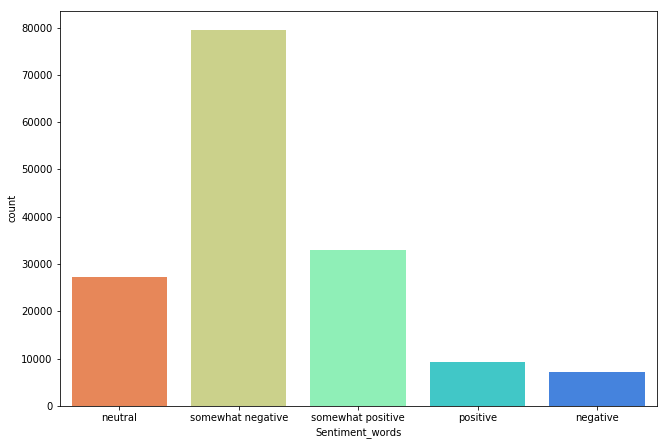

In [91]:
# visualizing data
a4_dims = (10.7, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data['Sentiment_words'], ax = ax, palette = "rainbow_r")

In [92]:
# cleaning text
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def cleaned_text(text):
    text = text.lower()
    text = re.sub(BAD_SYMBOLS, '', text)
    text = ' '.join(i for i in text.split() if i not in STOPWORDS)
    return text

In [93]:
data['Phrase'] = data['Phrase'].apply(cleaned_text)

In [94]:
X = data['Phrase']
y = data['Sentiment']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [96]:
tokenize = text.Tokenizer(num_words=1000, char_level=False)
tokenize.fit_on_texts(X_train) # only fit on train

X_train_tf = tokenize.texts_to_matrix(X_train)
X_test_tf = tokenize.texts_to_matrix(X_test)

In [97]:
max_words = 1000

In [98]:
num_classes = np.max(y_train) + 1
num_classes

5

In [99]:
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [100]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [103]:
# compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [104]:
model.fit(X_train_tf, y_train,
                    batch_size=30,
                    epochs=6,
                    verbose=1,
                    validation_split=0.1)

Train on 84272 samples, validate on 9364 samples
Epoch 1/6
84272/84272 [==============================] - 116s 1ms/step - loss: 1.0204 - acc: 0.6095 - val_loss: 1.0394 - val_acc: 0.5991
Epoch 2/6
84272/84272 [==============================] - 117s 1ms/step - loss: 0.9875 - acc: 0.6242 - val_loss: 1.0297 - val_acc: 0.6071
Epoch 3/6
84272/84272 [==============================] - 118s 1ms/step - loss: 0.9601 - acc: 0.6347 - val_loss: 1.0314 - val_acc: 0.6062
Epoch 4/6
84272/84272 [==============================] - 120s 1ms/step - loss: 0.9389 - acc: 0.6448 - val_loss: 1.0299 - val_acc: 0.6129
Epoch 5/6
84272/84272 [==============================] - 119s 1ms/step - loss: 0.9206 - acc: 0.6510 - val_loss: 1.0337 - val_acc: 0.6111
Epoch 6/6
84272/84272 [==============================] - 122s 1ms/step - loss: 0.9047 - acc: 0.6572 - val_loss: 1.0417 - val_acc: 0.6105


In [105]:
score = model.evaluate(X_test_tf, y_test,
                       batch_size=32, verbose=1)
print('Test accuracy:', score[1])

62424/62424 [==============================] - 22s 357us/step
Test accuracy: 0.609557221581
